## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
x_train.shape

(50000, 3072)

In [0]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()

    model.add(Dense(100, activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model
    
model = build_mlp()

In [0]:
"""
Compile 模型
"""
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.2001 - acc: 0.1971 - val_loss: 2.0871 - val_acc: 0.2654
Epoch 2/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.9866 - acc: 0.2898 - val_loss: 1.9727 - val_acc: 0.2766
Epoch 3/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.9095 - acc: 0.3170 - val_loss: 1.9293 - val_acc: 0.3138
Epoch 4/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.8632 - acc: 0.3351 - val_loss: 1.8503 - val_acc: 0.3344
Epoch 5/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.8299 - acc: 0.3479 - val_loss: 1.7911 - val_acc: 0.3611
Epoch 6/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.7912 - acc: 0.3606 - val_loss: 1.7952 - val_acc: 0.3538
Epoch 7/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.7660 - acc: 0.3701 - val_loss: 1.8219 - 

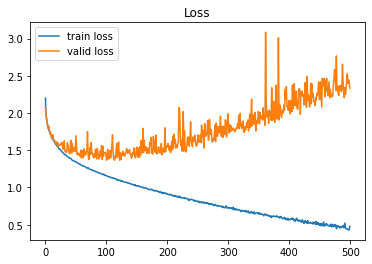

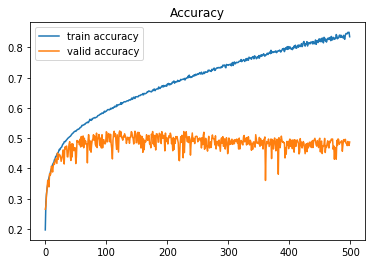

In [31]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()